In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
data=pd.read_csv("MNC_Salaries.csv")
data.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [150]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

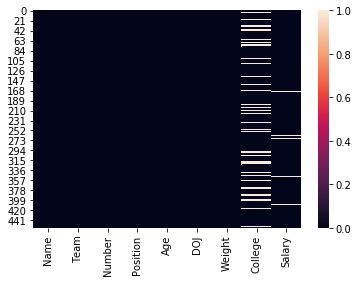

In [151]:
sns.heatmap(data.isnull())

we found null values in college and salary attributes

In [152]:
#Filling the null values
data['Salary'].fillna(data['Salary'].mean(),inplace=True)
data['College'].fillna(data['College'].mode().values[0],inplace=True)
data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
College     0
Salary      0
dtype: int64

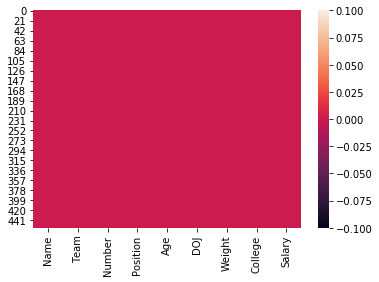

In [153]:
sns.heatmap(data.isnull())

From the above plot we can see that our data now has no null values

In [154]:
data.drop(['Name','DOJ'],axis=1 , inplace=True)

In [155]:
data.head()

,Team,Number,Position,Age,Weight,College,Salary
0,Boston Celtics,0,PG,25,180,Texas,7.730337e+06
1,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06
2,Boston Celtics,30,SG,27,205,Boston University,4.842684e+06
3,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06
4,Boston Celtics,8,PF,29,231,Kentucky,5.000000e+06


In [156]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Team','College','Position']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [157]:
data.head()

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,2,25,180,93,7.730337e+06
1,1,99,3,25,235,52,6.796117e+06
2,1,30,4,27,205,8,4.842684e+06
3,1,28,4,22,185,33,1.148640e+06
4,1,8,1,29,231,45,5.000000e+06


In [158]:
data.skew()

Team       -0.007368
Number      1.668386
Position   -0.014795
Age         0.626349
Weight      0.113788
College     0.261126
Salary      1.595511
dtype: float64

In [159]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])


In [160]:
data.skew()

Team       -0.007368
Number     -0.638011
Position   -0.014795
Age         0.284946
Weight      0.113788
College     0.261126
Salary     -0.450091
dtype: float64

In [161]:
data['Number']=np.log1p(data['Number'])
data.skew()

Team       -0.007368
Number     -1.596934
Position   -0.014795
Age         0.284946
Weight      0.113788
College     0.261126
Salary     -0.450091
dtype: float64

In [162]:
from  scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[1.57366745, 3.22335784, 0.05138118, ..., 1.57645405, 1.26761224,
        0.88822719],
       [1.57366745, 1.4130499 , 0.66017031, ..., 0.51166634, 0.1095912 ,
        0.78062159],
       [1.57366745, 0.78258336, 1.37172179, ..., 0.62730842, 1.58756562,
        0.49750563],
       ...,
       [1.56882854, 0.6737077 , 0.05138118, ..., 1.61441988, 0.34472349,
        0.90839778],
       [1.56882854, 0.56605474, 1.47448415, ..., 1.30894867, 0.34472349,
        0.06912658],
       [1.56882854, 0.64881739, 1.47448415, ..., 0.35980304, 0.41190415,
        0.86562683]])

In [163]:
df=data[(zs<3).all(axis=1)]
df.head()

,Team,Number,Position,Age,Weight,College,Salary
1,1,1.723689,3,3.258097,235,52,15.731862
2,1,1.489299,4,3.332205,205,8,15.392980
3,1,1.474144,4,3.135494,185,33,13.954090
4,1,1.162283,1,3.401197,231,45,15.424949
5,1,1.706721,1,3.401197,240,45,16.300417


In [164]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (457, 7)
shape of the data without  outliers   (434, 7)


*******box plots before outliers removal*******


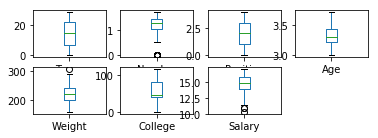

*******box plots after outliers removal*******


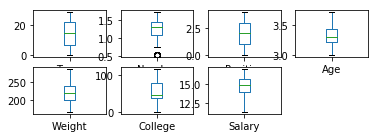

In [165]:
print('*******box plots before outliers removal*******')
data.plot(kind='box',subplots=True , layout=(4,4))
plt.show()
print('*******box plots after outliers removal*******')
df.plot(kind='box',subplots=True , layout=(4,4))
plt.show()

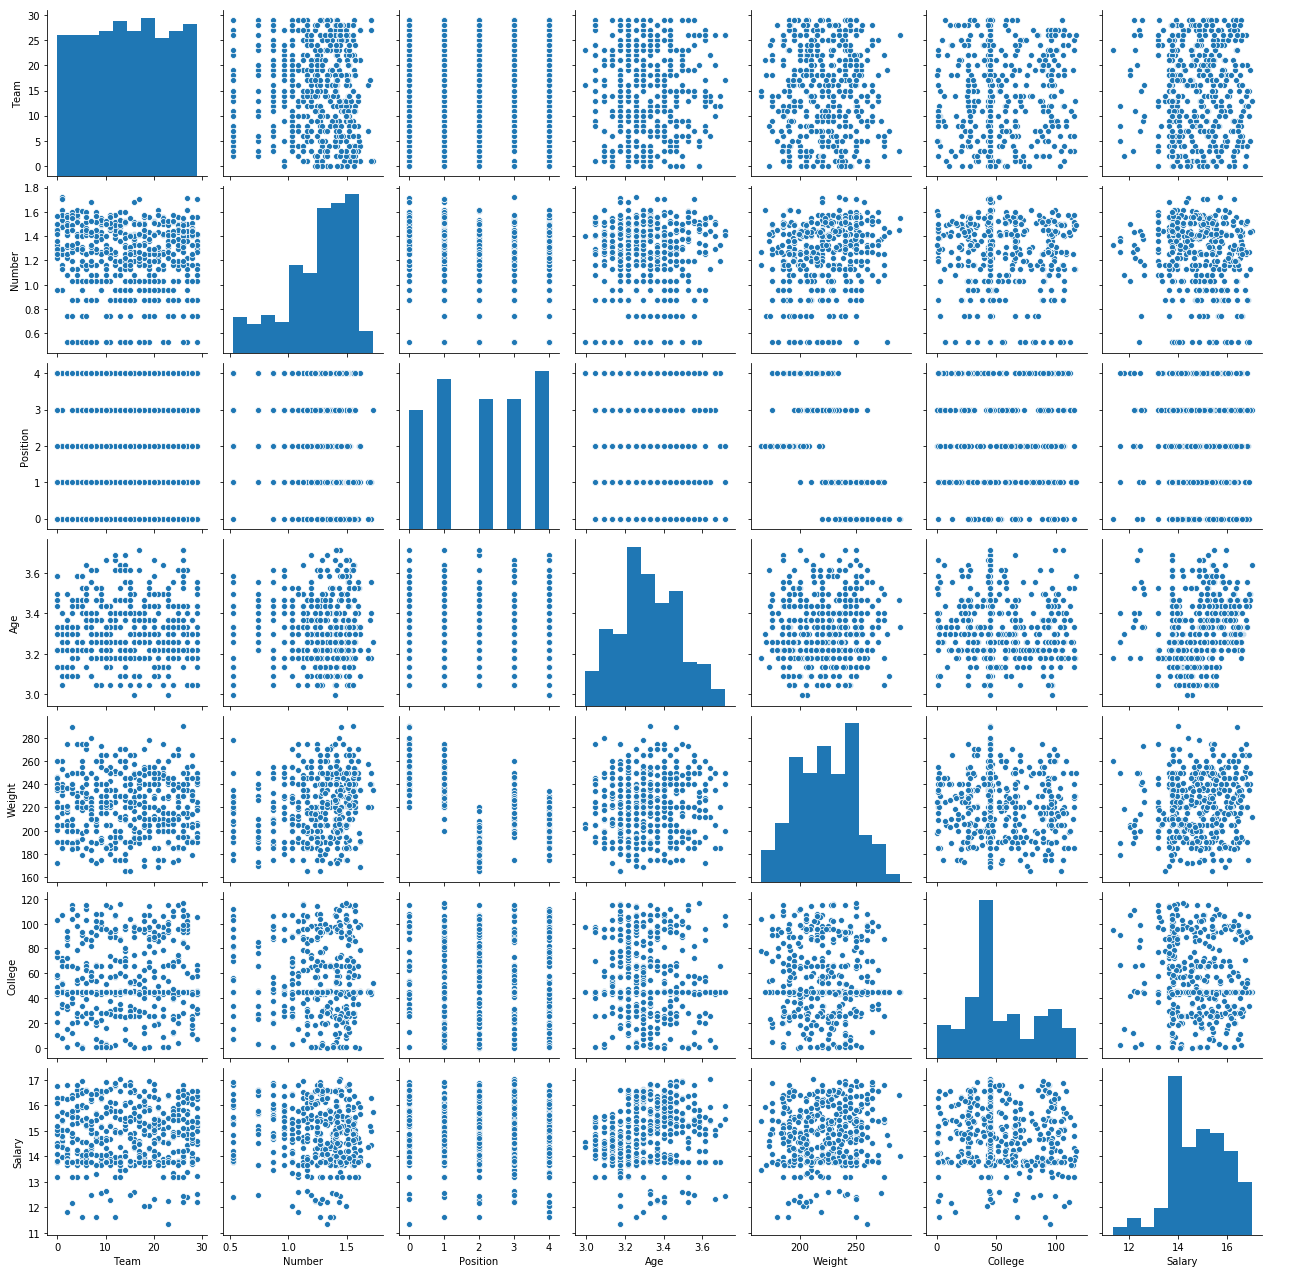

In [166]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)

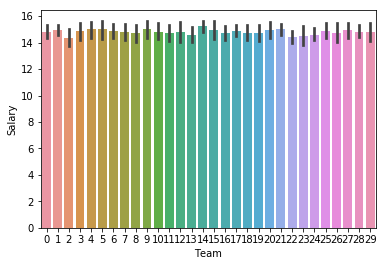

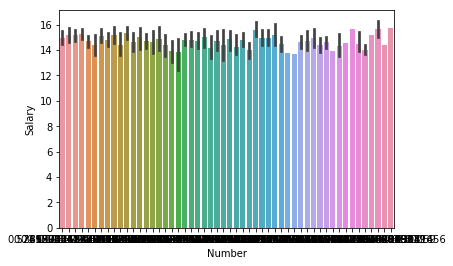

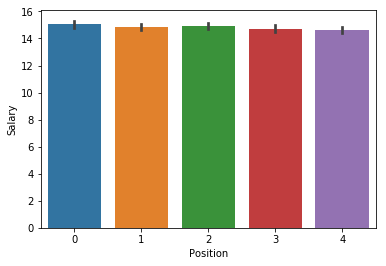

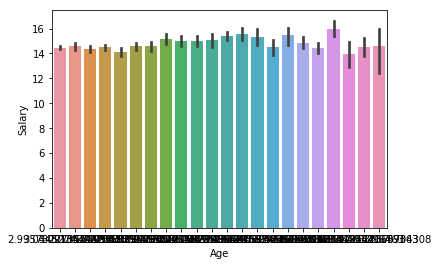

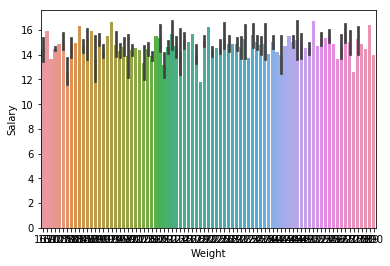

In [167]:
column=list(df.columns[:-2])
for val in column:
    sns.barplot(x=val,y='Salary', data=df)
    plt.show()

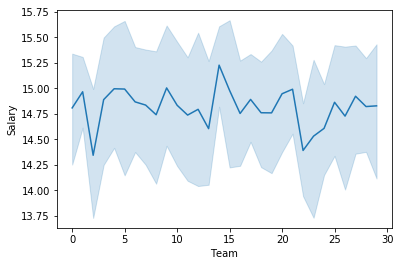

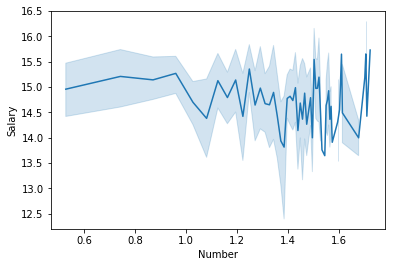

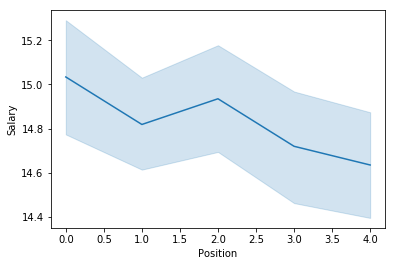

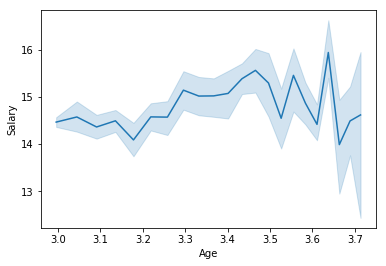

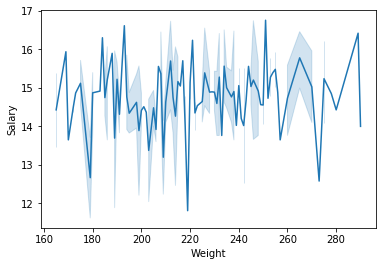

In [168]:
column=list(df.columns[:-2])
for val in column:
    sns.lineplot(x=val,y='Salary', data=df)
    plt.show()

In [205]:
x=df.iloc[:,:-2]
y=df['Salary']
print(x)
print(y)

     Team    Number  Position       Age  Weight
1       1  1.723689         3  3.258097     235
2       1  1.489299         4  3.332205     205
3       1  1.474144         4  3.135494     185
4       1  1.162283         1  3.401197     231
5       1  1.706721         1  3.401197     240
..    ...       ...       ...       ...     ...
452    28  1.555545         1  3.044522     234
453    28  1.162283         2  3.295837     203
454    28  1.448822         2  3.218876     179
455    28  1.408800         0  3.295837     256
456    28  1.439569         0  3.295837     231

[434 rows x 5 columns]
1      15.731862
2      15.392980
3      13.954090
4      15.424949
5      16.300417
         ...    
452    14.621898
453    14.704773
454    13.710151
455    14.880222
456    13.761347
Name: Salary, Length: 434, dtype: float64


In [188]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score reached is {} at random state {}' .format(max_r2_score,Final_r_state))

# Linear Regression

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
max_r2_score(lreg,x,y)

The maximum r2 score reached is 0.10051014940996061 at random state 75


In [190]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.044495868217351006
std deviation of cross_val_score 0.02807906551314333


# Lasso Regression

In [191]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.001}

In [192]:
lsreg=Lasso(alpha=0.001)
max_r2_score(lsreg,x,y)
print('mean of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.09961968239829788 at random state 75
mean of cross_val_score 0.044910156269680514
std deviation of cross_val_score 0.026748071945527963


# Knn Regressor 

In [193]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 28}

In [194]:
knr=KNeighborsRegressor(n_neighbors=28)
max_r2_score(knr,x,y)
from sklearn.model_selection import cross_val_score
print('mean of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.048089821411637645 at random state 58
mean of cross_val_score -0.0025977272868660693
std deviation of cross_val_score 0.01291365836277269


# Decision Tree Regressor

In [195]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 1}

In [196]:
DT=DecisionTreeRegressor(max_depth=1)
max_r2_score(DT,x,y)
print('mean of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(DT,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.13514035650214384 at random state 85
mean of cross_val_score 0.0669803752279053
std deviation of cross_val_score 0.07322734981866806


# Gradient Boosting

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [198]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=10)
max_r2_score(gbr,x,y)
print('mean of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.10065069007684191 at random state 85
mean of cross_val_score 0.07437168892920862
std deviation of cross_val_score 0.023026296599757513


# Ada Boost Regressor

In [199]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 10}

In [200]:
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=10,base_estimator=DT)
max_r2_score(ad,x,y)
print('mean of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(ad,x,y,cv=5,scoring='r2').std())

The maximum r2 score reached is 0.14201684856826047 at random state 85
mean of cross_val_score 0.054613762509273855
std deviation of cross_val_score 0.0715761487364027


In [202]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model",'R2 Score', 'Cross value score mean','Cross Value score std deviation']
x.add_row(["Linear Regression",0.1,0.044,0.02])
x.add_row(["Lasso Regression",0.99,0.44,0.026])
x.add_row(["Knn Regressor",0.04,"-0.002",0.012])
x.add_row(["Decision Tree Regressor",0.13,0.66,0.07])
x.add_row(["Gradient Boosting",0.01,0.07,0.023])
x.add_row(["Adaboosting",0.14,0.05,0.07])
print(x)

+-------------------------+----------+------------------------+---------------------------------+
|          Model          | R2 Score | Cross value score mean | Cross Value score std deviation |
+-------------------------+----------+------------------------+---------------------------------+
|    Linear Regression    |   0.1    |         0.044          |               0.02              |
|     Lasso Regression    |   0.99   |          0.44          |              0.026              |
|      Knn Regressor      |   0.04   |         -0.002         |              0.012              |
| Decision Tree Regressor |   0.13   |          0.66          |               0.07              |
|    Gradient Boosting    |   0.01   |          0.07          |              0.023              |
|       Adaboosting       |   0.14   |          0.05          |               0.07              |
+-------------------------+----------+------------------------+---------------------------------+


From the above table we can see that adaboosting is performing better with maxm R2 score =0.14

Therefore we Adaboosting will be selected as final model with parameter as below :-
    
    1)'Base_estimator': DecisionTreeRegressor
    2)'learning_rate': 0.01
    3)'n_estimators': 10
    4)Random state : 85
    

In [206]:
x=np.array(x)
y=np.array(y)
ad=AdaBoostRegressor(learning_rate=0.001,n_estimators=10,base_estimator=DT)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=85)
ad.fit(train_x,train_y)
pred = ad.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [207]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))

RMSE 1.069267161727268
r2_score 0.11876377170844443


In [208]:
from sklearn.externals import joblib
joblib.dump(ad,"AdaboostReg_Salary.pkl")

['AdaboostReg_Salary.pkl']